In [ ]:
!pip install -q ultralytics PyYAML wandb python-dotenv roboflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.0/716.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00


In [ ]:
import datetime
import shutil
from pathlib import Path
from collections import Counter

import yaml
import numpy as np
import pandas as pd
from ultralytics import YOLO
from sklearn.model_selection import KFold
import glob, os
from PIL import Image
from dotenv import load_dotenv
from roboflow import Roboflow

In [ ]:
pip install roboflow

In [ ]:


from roboflow import Roboflow
rf = Roboflow(api_key="ydSxii7e2gsOSAxKQJ9W")
project = rf.workspace("nguyenanhnhat").project("walnut-and-almond")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Walnut-and-Almond--1 in yolov8:: 100%|██████████| 1732/1732 [00:00<00:00, 5369.98it/s]


In [ ]:
%cat /content/Walnut-and-Almond--1/data.yaml

names:
- almond
- walnut
nc: 2
roboflow:
  license: CC BY 4.0
  project: walnut-and-almond
  url: https://universe.roboflow.com/project/walnut-and-almond/dataset/1
  version: 1
  workspace: project
test: /content/Walnut-and-Almond--1/test/images
train: /content/Walnut-and-Almond--1/train/images
val: /content/Walnut-and-Almond--1/valid/images


In [ ]:
model = YOLO('best.pt')

In [ ]:
results = model.train(
    device=0,
    verbose=True,
    data='/content/Walnut-and-Almond--1/data.yaml',
    epochs=50,
    save=True,
    plots=True,
    patience=30
)

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=best.pt, data=/content/Walnut-and-Almond--1/data.yaml, epochs=50, time=None, patience=30, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 94.4MB/s]


AMP: checks passed ✅


train: Scanning /content/Walnut-and-Almond--1/train/labels... 604 images, 0 backgrounds, 0 corrupt: 100%|██████████| 604/604 [00:00<00:00, 1978.07it/s]

train: New cache created: /content/Walnut-and-Almond--1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Walnut-and-Almond--1/valid/labels... 171 images, 0 backgrounds, 0 corrupt: 100%|██████████| 171/171 [00:00<00:00, 1258.22it/s]

val: New cache created: /content/Walnut-and-Almond--1/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.88G      1.541      1.956      1.523        143        640: 100%|██████████| 38/38 [00:24<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.59it/s]

                   all        171       1451      0.604      0.728      0.668      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.24G      1.499      1.253      1.453        235        640: 100%|██████████| 38/38 [00:19<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]


                   all        171       1451      0.622      0.731      0.699      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.26G      1.481      1.225      1.471        148        640: 100%|██████████| 38/38 [00:19<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]


                   all        171       1451      0.581      0.701      0.669      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.23G      1.493      1.212      1.459        188        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]


                   all        171       1451      0.637      0.578      0.544      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.23G      1.502      1.167      1.466        216        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.35it/s]


                   all        171       1451      0.661      0.691      0.717      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.31G      1.456      1.127      1.429        183        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]


                   all        171       1451      0.624      0.639      0.631      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.24G      1.484      1.163      1.451        164        640: 100%|██████████| 38/38 [00:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]


                   all        171       1451      0.652      0.748      0.716      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.25G      1.468      1.127      1.436        174        640: 100%|██████████| 38/38 [00:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]


                   all        171       1451      0.556      0.713       0.61      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.25G      1.462      1.111      1.441        191        640: 100%|██████████| 38/38 [00:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        171       1451      0.669      0.735      0.759       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.26G      1.469      1.099      1.439        167        640: 100%|██████████| 38/38 [00:19<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        171       1451      0.738      0.717      0.772      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.22G      1.443      1.057      1.431        207        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        171       1451      0.698      0.729       0.76      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.29G      1.448       1.06       1.43        177        640: 100%|██████████| 38/38 [00:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all        171       1451      0.718      0.706      0.765      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.31G      1.425      1.037       1.42        212        640: 100%|██████████| 38/38 [00:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]


                   all        171       1451      0.704      0.786      0.801       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.26G       1.42     0.9794      1.412        201        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]


                   all        171       1451      0.708      0.768      0.804      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.23G      1.426     0.9618      1.418        135        640: 100%|██████████| 38/38 [00:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all        171       1451      0.743      0.762      0.809      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.28G      1.384     0.9741      1.405        142        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]

                   all        171       1451        0.7      0.789      0.792      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.25G      1.394     0.9657      1.407        146        640: 100%|██████████| 38/38 [00:19<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]


                   all        171       1451      0.707       0.75      0.796      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.24G      1.395     0.9075      1.379        156        640: 100%|██████████| 38/38 [00:19<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]


                   all        171       1451      0.685      0.782      0.783      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.18G      1.401     0.9195      1.393        177        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]


                   all        171       1451       0.72      0.791      0.818      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.24G        1.4     0.9245      1.394        123        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all        171       1451      0.723       0.78      0.817      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.23G      1.386     0.8945      1.392        156        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]


                   all        171       1451      0.669      0.807      0.793      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.24G      1.354     0.8952      1.376        194        640: 100%|██████████| 38/38 [00:19<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all        171       1451      0.725      0.817      0.829        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.26G      1.377     0.8778       1.36        179        640: 100%|██████████| 38/38 [00:19<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        171       1451      0.748      0.816      0.843      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.32G       1.32     0.8275      1.332        163        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        171       1451       0.73      0.808      0.845      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.26G      1.363     0.8571       1.36        136        640: 100%|██████████| 38/38 [00:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        171       1451      0.752      0.801      0.843      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.34G      1.343     0.8294      1.354        154        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.28it/s]


                   all        171       1451      0.751      0.798      0.839      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.24G      1.328     0.8145      1.352        130        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]


                   all        171       1451      0.733      0.798      0.834      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.25G       1.31     0.7904      1.334        172        640: 100%|██████████| 38/38 [00:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        171       1451      0.741      0.804      0.841      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.24G      1.307     0.8037      1.336        151        640: 100%|██████████| 38/38 [00:19<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.26it/s]

                   all        171       1451      0.746      0.806      0.848      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.24G      1.309     0.7983       1.35        130        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all        171       1451      0.747       0.78      0.818      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.24G      1.304      0.791      1.332        166        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        171       1451      0.745      0.822      0.838      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.23G      1.297     0.7858      1.339        151        640: 100%|██████████| 38/38 [00:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all        171       1451      0.739      0.826      0.853      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.23G      1.295     0.7792      1.331        154        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        171       1451       0.75      0.817      0.855      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.21G      1.259     0.7493      1.312        128        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]


                   all        171       1451       0.77       0.81      0.849      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.24G      1.271      0.744      1.317        169        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all        171       1451      0.747      0.823      0.851      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.24G      1.273     0.7359      1.321        128        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]


                   all        171       1451      0.769      0.809       0.85      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.22G      1.261     0.7364      1.306        169        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.38it/s]

                   all        171       1451      0.773      0.817      0.853       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       7.4G      1.235     0.7243        1.3        141        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.37it/s]

                   all        171       1451      0.755      0.809      0.847      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.24G      1.234     0.7124      1.308        179        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all        171       1451      0.748       0.83      0.846      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.24G      1.211     0.6894      1.277         95        640: 100%|██████████| 38/38 [00:19<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]


                   all        171       1451      0.734      0.858      0.842      0.517
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       7.3G      1.203     0.6335      1.302        134        640: 100%|██████████| 38/38 [00:22<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        171       1451      0.747      0.827      0.847      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.22G      1.174     0.5943      1.275        119        640: 100%|██████████| 38/38 [00:19<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]


                   all        171       1451      0.785      0.815      0.855       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.18G      1.169     0.6018      1.287         82        640: 100%|██████████| 38/38 [00:19<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        171       1451      0.774      0.814       0.86       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.23G      1.154     0.5914      1.278        141        640: 100%|██████████| 38/38 [00:19<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all        171       1451      0.755      0.827      0.857      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.26G      1.133     0.5729      1.259        110        640: 100%|██████████| 38/38 [00:19<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all        171       1451      0.751       0.84      0.861      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.26G      1.122     0.5532      1.257        116        640: 100%|██████████| 38/38 [00:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all        171       1451      0.758      0.837      0.858      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       7.2G      1.088     0.5371      1.234         93        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.37it/s]

                   all        171       1451       0.75      0.836       0.85      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.26G      1.097     0.5305      1.235        112        640: 100%|██████████| 38/38 [00:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all        171       1451      0.742      0.851      0.853      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       7.2G      1.069     0.5236      1.215        123        640: 100%|██████████| 38/38 [00:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]

                   all        171       1451      0.739      0.851      0.853      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.34G      1.058     0.5098      1.226         88        640: 100%|██████████| 38/38 [00:19<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]


                   all        171       1451      0.736      0.841      0.855      0.523

50 epochs completed in 0.341 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.0MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.33s/it]


                   all        171       1451      0.785      0.815      0.855       0.53
                almond        171        879       0.72      0.822       0.82      0.481
                walnut        171        572      0.851      0.809      0.889      0.579
Speed: 0.2ms preprocess, 10.7ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
model.predict(
    source='/content/Walnut-and-Almond--1/test/images',
    save=True,
    imgsz=640,
    conf=0.2,
    device=0,
)


image 1/85 /content/Walnut-and-Almond--1/test/images/almond_-112-_jpg.rf.1ee4f64f5cdcf5115648dc22fb1cf9c0.jpg: 640x640 33 almonds, 36.3ms
image 2/85 /content/Walnut-and-Almond--1/test/images/almond_-121-_jpg.rf.d1936b49c6e0bb7822c77001ba244362.jpg: 640x640 1 walnut, 36.5ms
image 3/85 /content/Walnut-and-Almond--1/test/images/almond_-126-_jpg.rf.aed8761942f4553ce2014942a852e13e.jpg: 640x640 11 almonds, 35.0ms
image 4/85 /content/Walnut-and-Almond--1/test/images/almond_-129-_jpg.rf.6a5360b5951848abbbdc9fbfb0cf5692.jpg: 640x640 13 almonds, 31.6ms
image 5/85 /content/Walnut-and-Almond--1/test/images/almond_-164-_jpg.rf.e111e48560bbf043b444010006408bc0.jpg: 640x640 25 almonds, 31.4ms
image 6/85 /content/Walnut-and-Almond--1/test/images/almond_-187-_jpg.rf.3ec59644c5dbc3f26f4fc96a3ef0d593.jpg: 640x640 24 almonds, 31.6ms
image 7/85 /content/Walnut-and-Almond--1/test/images/almond_-230-_jpg.rf.b5cf2e2178f3cbc30713a62a2311d235.jpg: 640x640 20 almonds, 24.3ms
image 8/85 /content/Walnut-and-Almo

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'almond', 1: 'walnut'}
 obb: None
 orig_img: array([[[ 96, 187, 254],
         [ 96, 187, 254],
         [ 95, 186, 255],
         ...,
         [105, 195, 254],
         [104, 193, 254],
         [104, 193, 254]],
 
        [[ 96, 187, 254],
         [ 96, 187, 254],
         [ 95, 186, 255],
         ...,
         [105, 195, 254],
         [104, 193, 254],
         [104, 193, 254]],
 
        [[ 96, 187, 254],
         [ 96, 187, 254],
         [ 95, 186, 255],
         ...,
         [106, 196, 255],
         [105, 194, 255],
         [104, 193, 254]],
 
        ...,
 
        [[ 75, 152, 231],
         [ 72, 149, 228],
         [ 64, 143, 222],
         ...,
         [108, 191, 255],
         [108, 191, 255],
         [105, 189, 255]],
 
        [[ 75, 153, 230],
         [ 71, 149, 226],
         [ 63, 143, 220],
         ...,
     

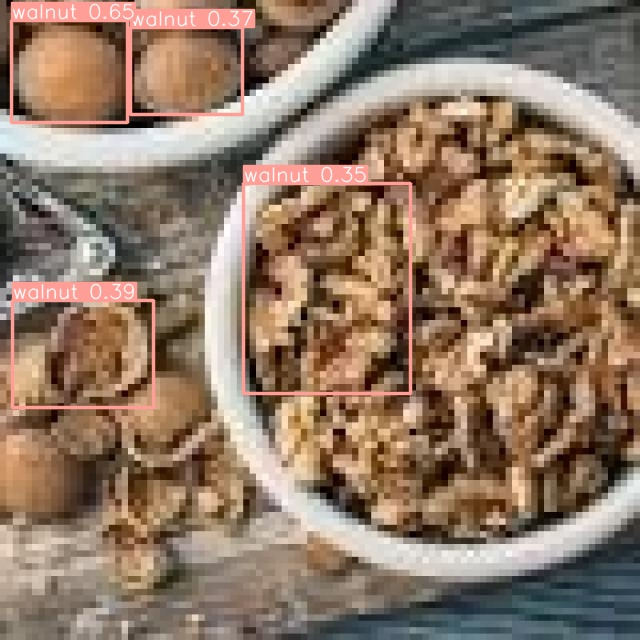

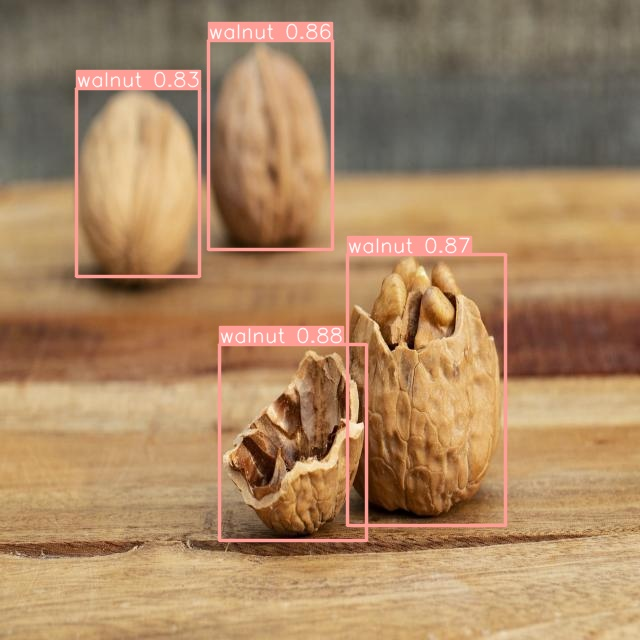

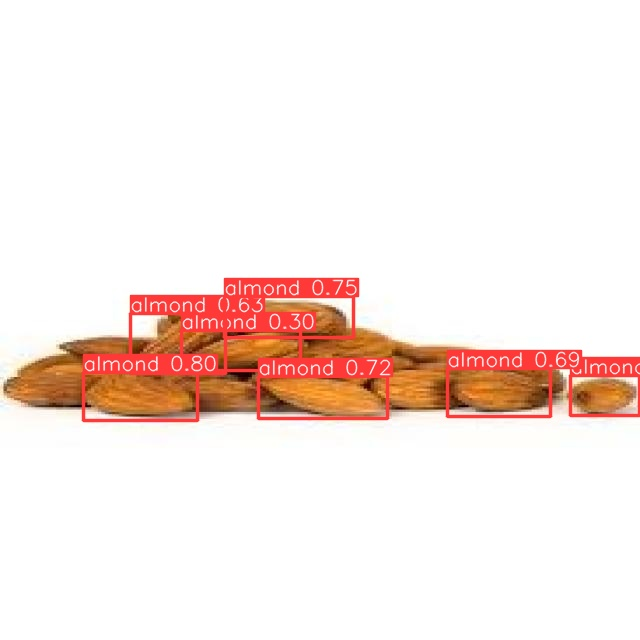

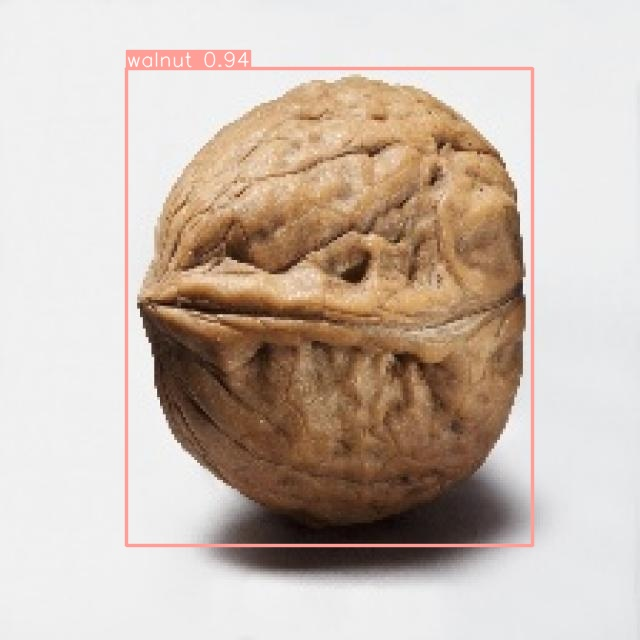

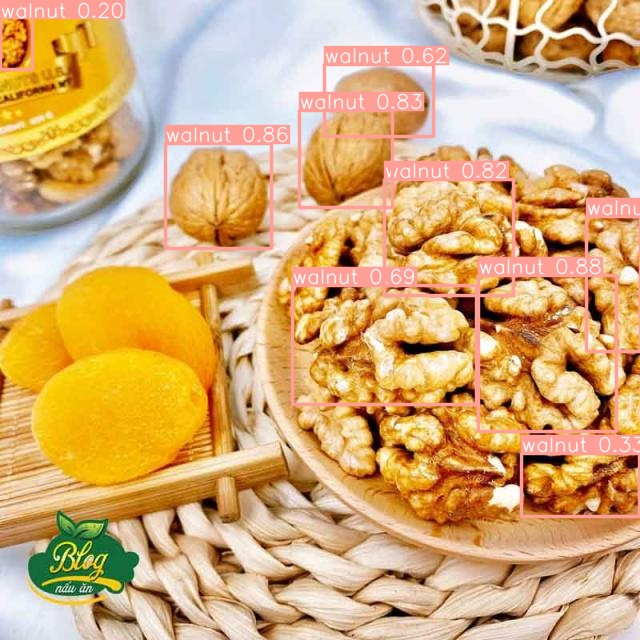

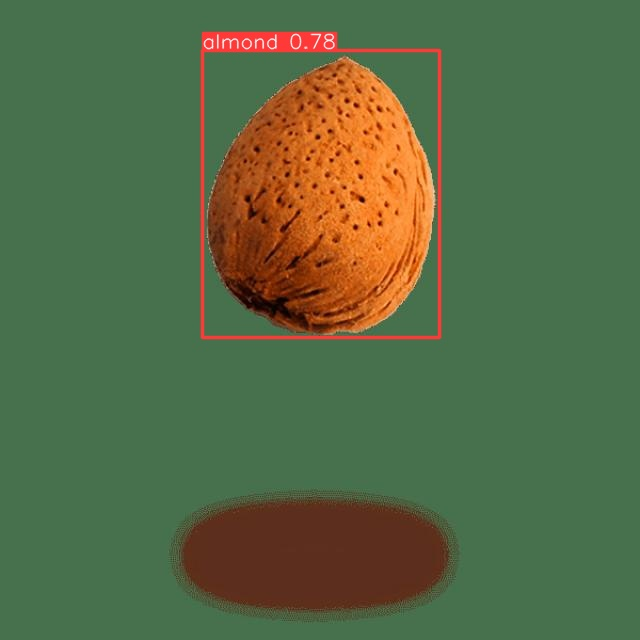

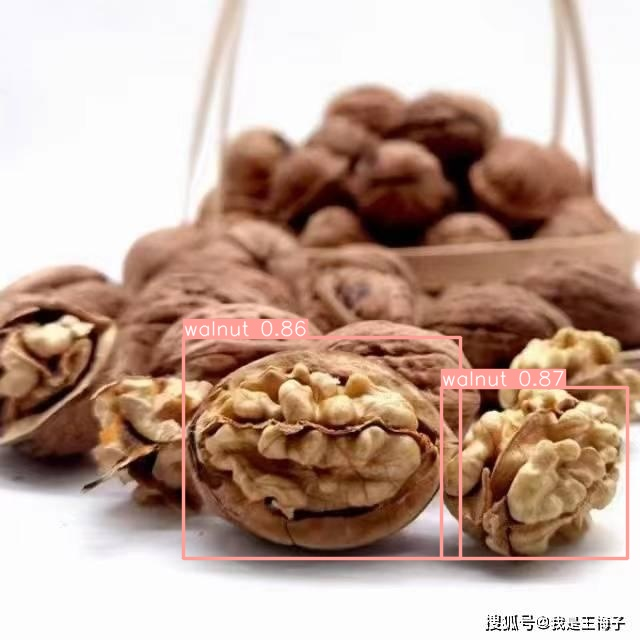

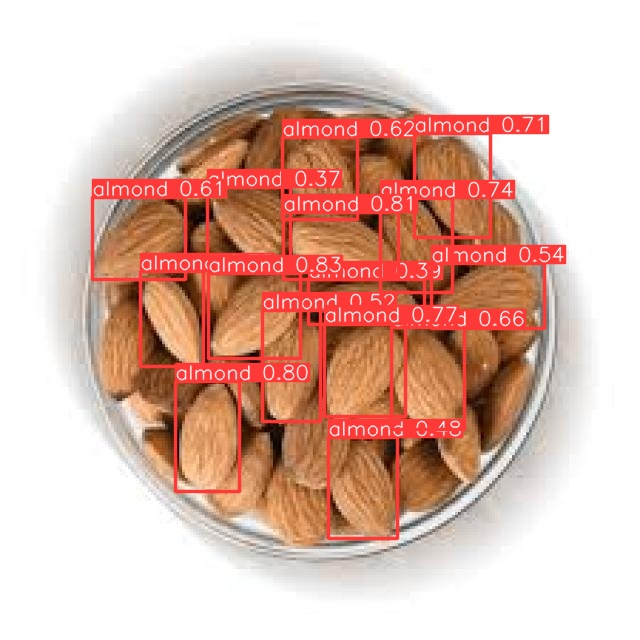

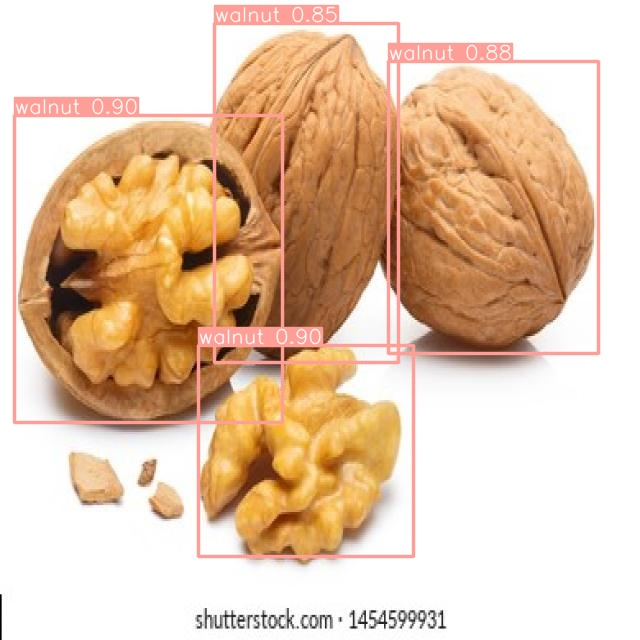

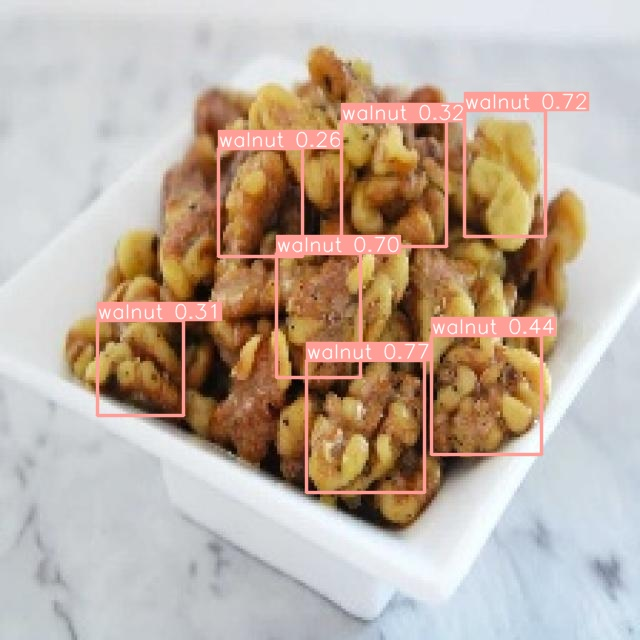

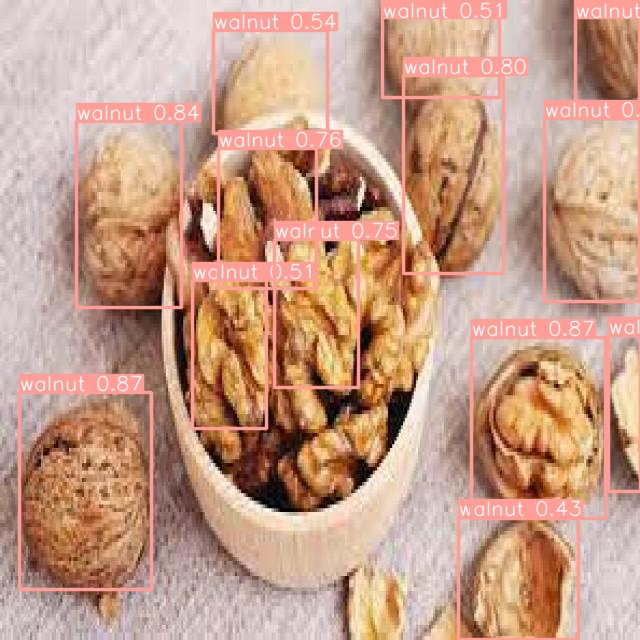

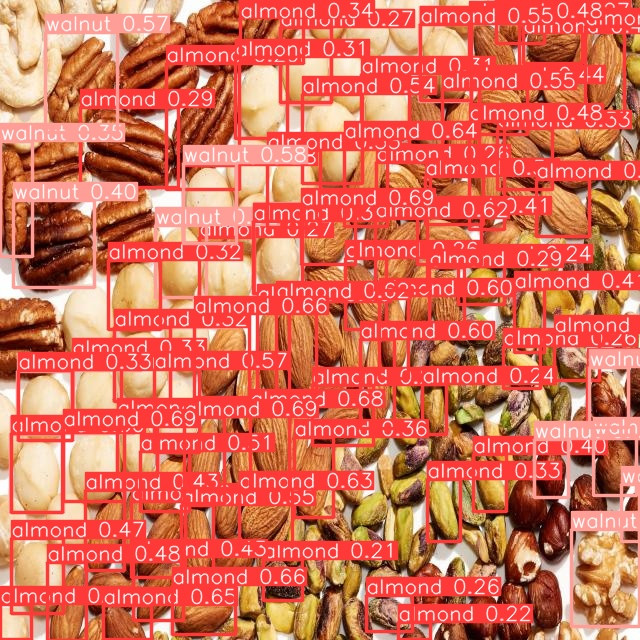

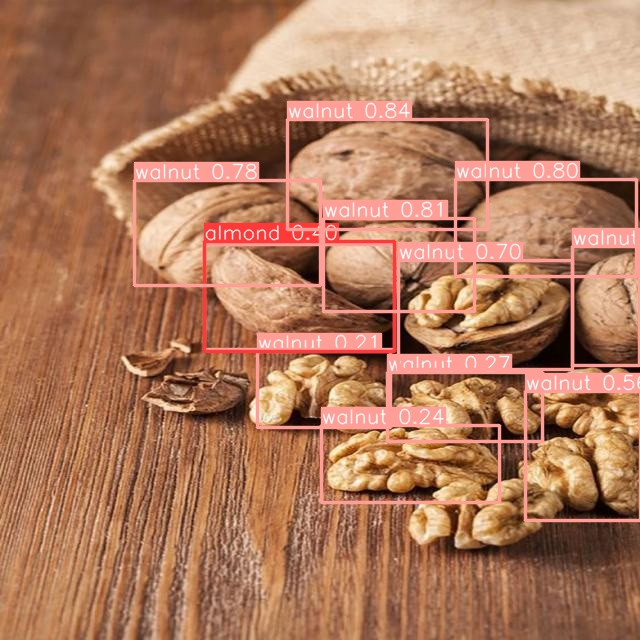

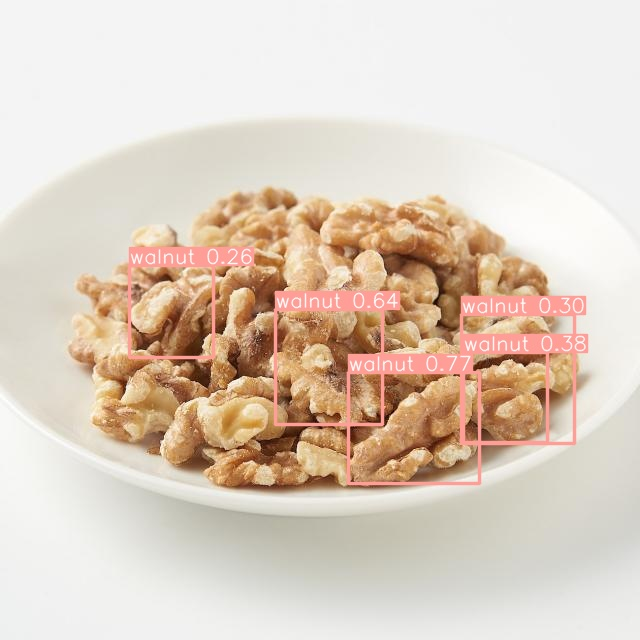

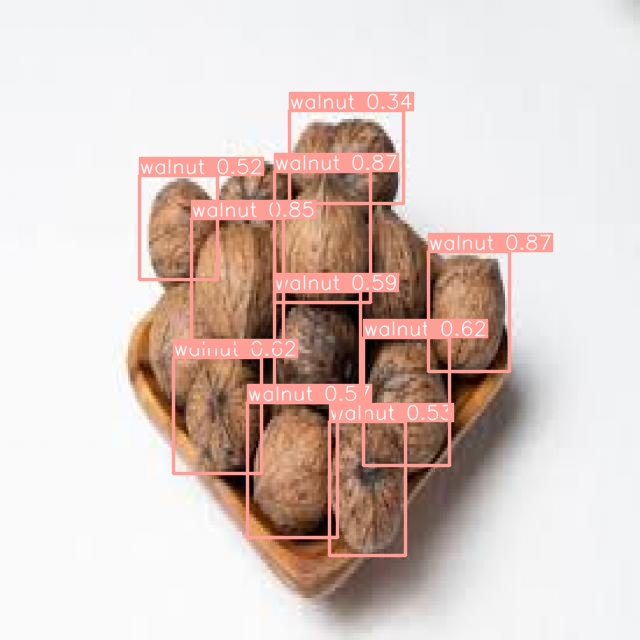

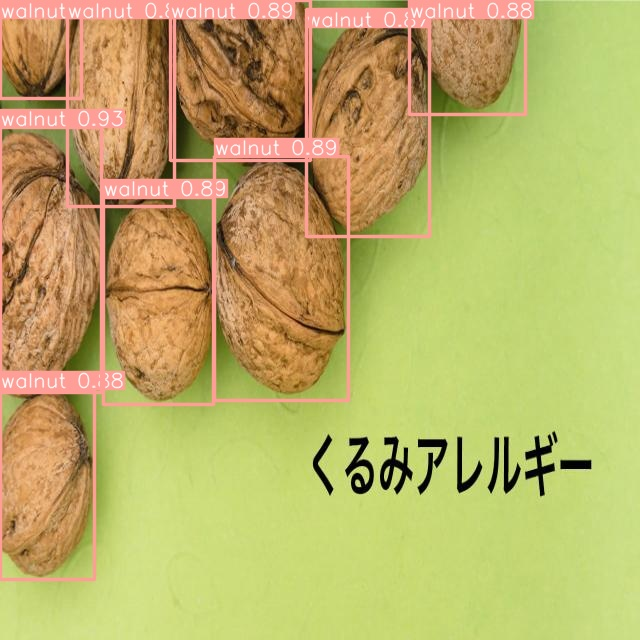

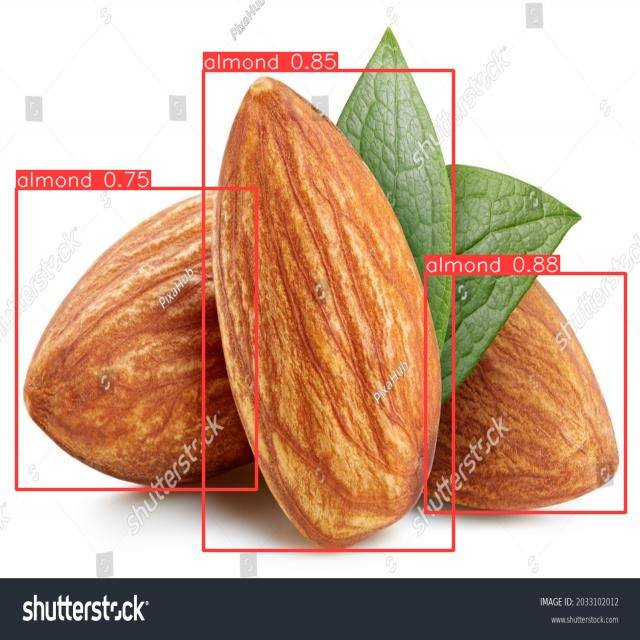

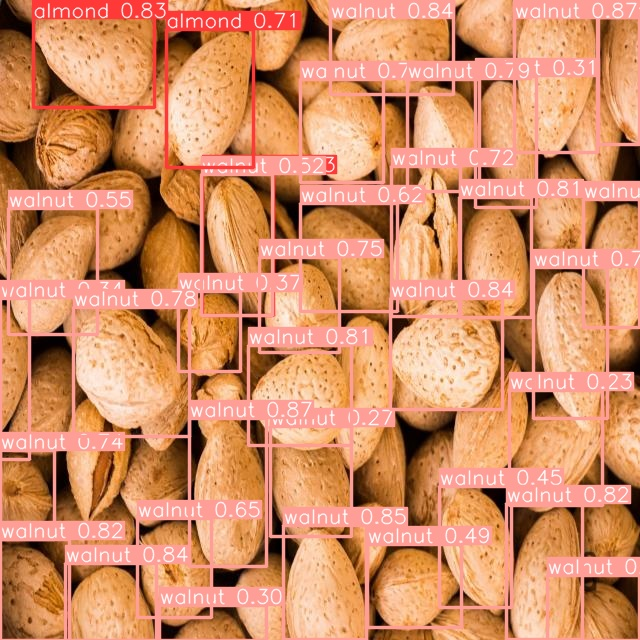

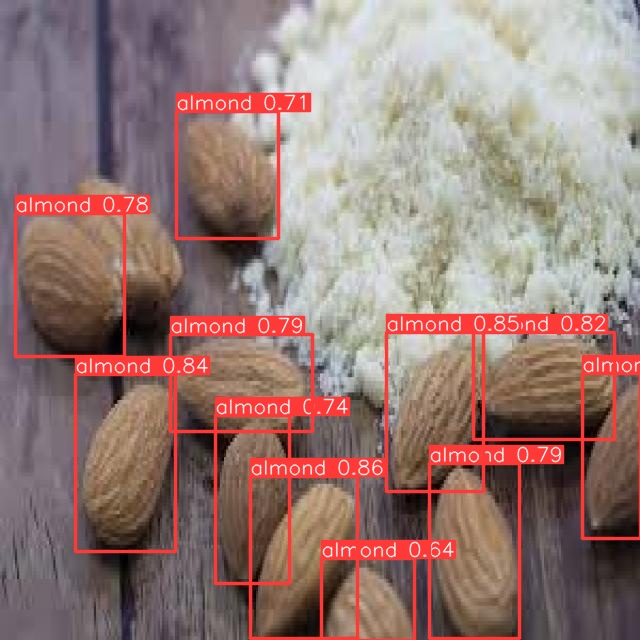

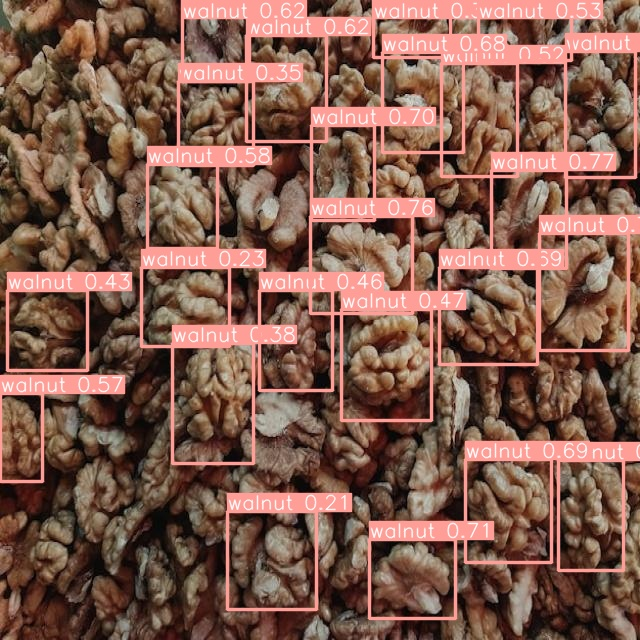

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/train22/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print(" ")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import HTML
from base64 import b64encode

video_path = '/content/y2mate.is - Comparing Almonds and Walnuts_ Nutrition, Taste, and More __ Which is Healthier_ Almonds or Walnuts_-9_rLNWQN2c4-360p-1708695777.mp4'

with open(video_path, 'rb') as f:
    video_data = b64encode(f.read()).decode()

In [ ]:
model.predict(
    source='/content/y2mate.is - Comparing Almonds and Walnuts_ Nutrition, Taste, and More __ Which is Healthier_ Almonds or Walnuts_-9_rLNWQN2c4-360p-1708695777.mp4',
    save=True,
    imgsz=640,
    conf=0.2,
    device=0,
)

Streaming output truncated to the last 5000 lines.
video 1/1 (211/5208) /content/y2mate.is - Comparing Almonds and Walnuts_ Nutrition, Taste, and More __ Which is Healthier_ Almonds or Walnuts_-9_rLNWQN2c4-360p-1708695777.mp4: 384x640 2 almonds, 12.3ms
video 1/1 (212/5208) /content/y2mate.is - Comparing Almonds and Walnuts_ Nutrition, Taste, and More __ Which is Healthier_ Almonds or Walnuts_-9_rLNWQN2c4-360p-1708695777.mp4: 384x640 2 almonds, 11.9ms
video 1/1 (213/5208) /content/y2mate.is - Comparing Almonds and Walnuts_ Nutrition, Taste, and More __ Which is Healthier_ Almonds or Walnuts_-9_rLNWQN2c4-360p-1708695777.mp4: 384x640 2 almonds, 12.1ms
video 1/1 (214/5208) /content/y2mate.is - Comparing Almonds and Walnuts_ Nutrition, Taste, and More __ Which is Healthier_ Almonds or Walnuts_-9_rLNWQN2c4-360p-1708695777.mp4: 384x640 2 almonds, 12.9ms
video 1/1 (215/5208) /content/y2mate.is - Comparing Almonds and Walnuts_ Nutrition, Taste, and More __ Which is Healthier_ Almonds or Walnuts

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'almond', 1: 'walnut'}
 obb: None
 orig_img: array([[[223, 209, 221],
         [223, 209, 221],
         [223, 209, 221],
         ...,
         [229, 222, 228],
         [229, 222, 228],
         [229, 222, 228]],
 
        [[223, 209, 221],
         [223, 209, 221],
         [223, 209, 221],
         ...,
         [229, 222, 228],
         [229, 222, 228],
         [229, 222, 228]],
 
        [[223, 209, 221],
         [223, 209, 221],
         [223, 209, 221],
         ...,
         [229, 222, 228],
         [229, 222, 228],
         [229, 222, 228]],
 
        ...,
 
        [[152, 140, 165],
         [151, 139, 164],
         [149, 137, 162],
         ...,
         [218, 201, 217],
         [218, 201, 217],
         [218, 201, 217]],
 
        [[151, 139, 164],
         [151, 139, 164],
         [151, 139, 164],
         ...,
     